# EDA Smartphones

### Importar librerías

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import re

### Carga de datos

In [2]:
cell = pd.read_csv('../data/raw/smartphonesmessy.csv')

### Primera exploración

In [3]:
cell

,model,price,rating,sim,processor,ram,battery,display,camera,card,os
0,OnePlus 11 5G,"₹54,999",89.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Snapdragon 8 Gen2, Octa Core, 3.2 GHz Processor","12 GB RAM, 256 GB inbuilt",5000 mAh Battery with 100W Fast Charging,"6.7 inches, 1440 x 3216 px, 120 Hz Display wit...",50 MP + 48 MP + 32 MP Triple Rear & 16 MP Fron...,Memory Card Not Supported,Android v13
1,OnePlus Nord CE 2 Lite 5G,"₹19,989",81.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Snapdragon 695, Octa Core, 2.2 GHz Processor","6 GB RAM, 128 GB inbuilt",5000 mAh Battery with 33W Fast Charging,"6.59 inches, 1080 x 2412 px, 120 Hz Display wi...",64 MP + 2 MP + 2 MP Triple Rear & 16 MP Front ...,"Memory Card (Hybrid), upto 1 TB",Android v12
2,Samsung Galaxy A14 5G,"₹16,499",75.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Exynos 1330, Octa Core, 2.4 GHz Processor","4 GB RAM, 64 GB inbuilt",5000 mAh Battery with 15W Fast Charging,"6.6 inches, 1080 x 2408 px, 90 Hz Display with...",50 MP + 2 MP + 2 MP Triple Rear & 13 MP Front ...,"Memory Card Supported, upto 1 TB",Android v13
3,Motorola Moto G62 5G,"₹14,999",81.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Snapdragon 695, Octa Core, 2.2 GHz Processor","6 GB RAM, 128 GB inbuilt",5000 mAh Battery with Fast Charging,"6.55 inches, 1080 x 2400 px, 120 Hz Display wi...",50 MP + 8 MP + 2 MP Triple Rear & 16 MP Front ...,"Memory Card (Hybrid), upto 1 TB",Android v12
4,Realme 10 Pro Plus,"₹24,999",82.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Dimensity 1080, Octa Core, 2.6 GHz Processor","6 GB RAM, 128 GB inbuilt",5000 mAh Battery with 67W Fast Charging,"6.7 inches, 1080 x 2412 px, 120 Hz Display wit...",108 MP + 8 MP + 2 MP Triple Rear & 16 MP Front...,Memory Card Not Supported,Android v13
...,...,...,...,...,...,...,...,...,...,...,...
1015,Motorola Moto Edge S30 Pro,"₹34,990",83.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Snapdragon 8 Gen1, Octa Core, 3 GHz Processor","8 GB RAM, 128 GB inbuilt",5000 mAh Battery with 68.2W Fast Charging,"6.67 inches, 1080 x 2460 px, 120 Hz Display wi...",64 MP + 8 MP + 2 MP Triple Rear & 16 MP Front ...,Android v12,No FM Radio
1016,Honor X8 5G,"₹14,990",75.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Snapdragon 480+, Octa Core, 2.2 GHz Processor","6 GB RAM, 128 GB inbuilt",5000 mAh Battery with 22.5W Fast Charging,"6.5 inches, 720 x 1600 px Display with Water D...",48 MP + 2 MP + Depth Sensor Triple Rear & 8 MP...,"Memory Card Supported, upto 1 TB",Android v11
1017,POCO X4 GT 5G (8GB RAM + 256GB),"₹28,990",85.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC, IR Bl...","Dimensity 8100, Octa Core, 2.85 GHz Processor","8 GB RAM, 256 GB inbuilt",5080 mAh Battery with 67W Fast Charging,"6.6 inches, 1080 x 2460 px, 144 Hz Display wit...",64 MP + 8 MP + 2 MP Triple Rear & 16 MP Front ...,Memory Card Not Supported,Android v12
1018,Motorola Moto G91 5G,"₹19,990",80.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Snapdragon 695, Octa Core, 2.2 GHz Processor","6 GB RAM, 128 GB inbuilt",5000 mAh Battery with Fast Charging,"6.8 inches, 1080 x 2400 px Display with Punch ...",108 MP + 8 MP + 2 MP Triple Rear & 32 MP Front...,"Memory Card Supported, upto 1 TB",Android v12


In [4]:
cell.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1020 entries, 0 to 1019
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   model      1020 non-null   object 
 1   price      1020 non-null   object 
 2   rating     879 non-null    float64
 3   sim        1020 non-null   object 
 4   processor  1020 non-null   object 
 5   ram        1020 non-null   object 
 6   battery    1020 non-null   object 
 7   display    1020 non-null   object 
 8   camera     1019 non-null   object 
 9   card       1013 non-null   object 
 10  os         1003 non-null   object 
dtypes: float64(1), object(10)
memory usage: 87.8+ KB


In [5]:
cell.describe()

,rating
count,879.000000
mean,78.258248
std,7.402854
min,60.000000
25%,74.000000
50%,80.000000
75%,84.000000
max,89.000000


### Cardinalidad

In [6]:
for i in cell:
    print(f'La cardinalidad de la variable {i} es {(cell[i].nunique()/cell.shape[0])*100:.2f}%')

La cardinalidad de la variable model es 100.00%
La cardinalidad de la variable price es 40.39%
La cardinalidad de la variable rating es 2.94%
La cardinalidad de la variable sim es 2.75%
La cardinalidad de la variable processor es 29.22%
La cardinalidad de la variable ram es 5.69%
La cardinalidad de la variable battery es 25.10%
La cardinalidad de la variable display es 36.18%
La cardinalidad de la variable camera es 27.94%
La cardinalidad de la variable card es 6.18%
La cardinalidad de la variable os es 4.71%


### Limpieza de Datos

In [7]:
cell['rating'].mean()

78.25824800910125

In [8]:
filas_nan = cell[cell.isnull().any(axis=1)]

In [9]:
filas_nan

,model,price,rating,sim,processor,ram,battery,display,camera,card,os
14,Samsung Galaxy S23 Ultra 5G,"₹1,14,990",NaN,"Dual Sim, 3G, 4G, 5G, VoLTE, Vo5G, Wi-Fi, NFC","Snapdragon 8 Gen2, Octa Core, 3.2 GHz Processor","8 GB RAM, 256 GB inbuilt",5000 mAh Battery with 45W Fast Charging,"6.8 inches, 1440 x 3088 px, 120 Hz Display wit...",200 MP Quad Rear & 12 MP Front Camera,Memory Card Not Supported,Android v13
29,OnePlus 11 Pro,"₹69,999",NaN,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Snapdragon 8 Gen2, Octa Core, 3.2 GHz Processor","8 GB RAM, 128 GB inbuilt",4500 mAh Battery with 100W Fast Charging,"6.7 inches, 1440 x 3216 px, 120 Hz Display wit...",50 MP + 48 MP + 32 MP Triple Rear & 16 MP Fron...,Android v13,No FM Radio
37,Samsung Galaxy S22 Ultra 5G,"₹91,999",NaN,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Snapdragon 8 Gen1, Octa Core, 3 GHz Processor","12 GB RAM, 256 GB inbuilt",5000 mAh Battery with 45W Fast Charging,"6.8 inches, 1440 x 3080 px, 120 Hz Display wit...",108 MP Quad Rear & 40 MP Front Camera,Android v12,Bluetooth
49,Samsung Galaxy A74 5G,"₹42,999",NaN,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Snapdragon 7 Gen1, Octa Core, 2.36 GHz Processor","8 GB RAM, 128 GB inbuilt",5000 mAh Battery with 33W Fast Charging,"6.7 inches, 1080 x 2412 px, 120 Hz Display wit...",108 MP Quad Rear & 32 MP Front Camera,"Memory Card (Hybrid), upto 1 TB",Android v12
69,Oppo Find N Fold,"₹99,990",NaN,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Snapdragon 8+ Gen1, Octa Core, 3.2 GHz Processor","8 GB RAM, 256 GB inbuilt",5000 mAh Battery with 67W Fast Charging,"7.1 inches, 1792 x 1920 px, 120 Hz Display wit...","Foldable Display, Dual Display",64 MP + 10 MP + 8 MP Triple Rear & 32 MP Front...,Android v12
...,...,...,...,...,...,...,...,...,...,...,...
996,Vivo Y55S,"₹13,490",NaN,"Dual Sim, 3G, 4G, VoLTE, Wi-Fi","Snapdragon 425, Quad Core, 1.2 GHz Processor","3 GB RAM, 16 GB inbuilt",2730 mAh Battery,"5.2 inches, 720 x 1280 px Display",13 MP Rear & 5 MP Front Camera,Memory Card Supported,Android v6.0 (Marshmallow)
1000,XTouch F40 Flip,"₹1,999",NaN,Dual Sim,No 3G,No Wifi,"32 MB RAM, 32 MB inbuilt",800 mAh Battery,"1.77 inches, 240 x 320 px Display",Dual Display,1.3 MP Rear Camera
1003,Lava X3,"₹6,999",NaN,"Dual Sim, 3G, 4G, VoLTE, Wi-Fi","Helio A22, Quad Core, 2 GHz Processor","3 GB RAM, 32 GB inbuilt",4000 mAh Battery,"6.5 inches, 1600 x 720 px Display with Water D...",8 MP Dual Rear & 5 MP Front Camera,"Memory Card (Hybrid), upto 512 GB",Android v12
1012,itel A23s,"₹4,787",NaN,"Dual Sim, 3G, 4G, Wi-Fi","Spreadtrum SC9832E, Quad Core, 1.4 GHz Processor","2 GB RAM, 32 GB inbuilt",3020 mAh Battery,"5 inches, 854 x 480 px Display",2 MP Rear Camera,Android v11,No FM Radio


In [10]:
filas_nan.to_csv('../../src/data/process/filasnan.csv', index=False)

In [11]:
filasnan = pd.read_csv('../../src/data/process/filasnan.csv')

In [12]:
filasnan['rating'].fillna(78.25, inplace=True)

In [13]:
filasnan[filasnan.isnull().any(axis=1)]

,model,price,rating,sim,processor,ram,battery,display,camera,card,os
51,Nokia 110 4G,"₹1,762",78.25,"Dual Sim, 3G, 4G, VoLTE",No Wifi,"128 MB RAM, 48 MB inbuilt",1020 mAh Battery,"1.8 inches, 120 x 160 px Display",0.3 MP Rear Camera,"Memory Card Supported, upto 32 GB",NaN
59,Samsung Guru Music 2 Dual Sim,"₹1,949",78.25,Dual Sim,No Wifi,"Single Core, 208 MHz Processor",800 mAh Battery,"2 inches, 128 x 160 px Display",No Rear Camera,"Memory Card Supported, upto 16 GB",NaN
65,Nokia 105 (2019),"₹1,299",78.25,Single Sim,No Wifi,"4 MB RAM, 4 MB inbuilt",800 mAh Battery,"1.77 inches, 120 x 160 px Display",No Rear Camera,NaN,NaN
72,Namotel Achhe Din,₹99,78.25,"Dual Sim, 3G, Wi-Fi","1 GB RAM, 4 GB inbuilt",1325 mAh Battery,"4 inches, 720 x 1280 px Display",2 MP Rear & 0.3 MP Front Camera,Android v5.0 (Lollipop),Bluetooth,NaN
75,Nokia 105 Plus,"₹1,299",78.25,Dual Sim,"4 MB RAM, 4 MB inbuilt",800 mAh Battery,"1.77 inches, 128 x 160 px Display",No Rear Camera,"Memory Card Supported, upto 32 GB",Bluetooth,NaN
77,Nokia 2760 Flip,"₹5,490",78.25,"Dual Sim, 3G, 4G, Wi-Fi",1450 mAh Battery,"3.6 inches, 240 x 320 px Display",5 MP Rear & 5 MP Front Camera,"Memory Card Supported, upto 32 GB",Kaios v3.0,Bluetooth,NaN
78,Motorola Moto A10,"₹1,339",78.25,Dual Sim,"4 MB RAM, 4 MB inbuilt",1750 mAh Battery,"1.8 inches, 160 x 128 px Display",No Rear Camera,"Memory Card Supported, upto 32 GB",NaN,NaN
80,Zanco Tiny T1,"₹2,799",78.25,Single Sim,"32 MB RAM, 32 MB inbuilt",200 mAh Battery,"0.49 inches, 64 x 32 px Display",No Rear Camera,No FM Radio,Bluetooth,NaN
81,itel it2163S,₹958,78.25,Dual Sim,"4 MB RAM, 4 MB inbuilt",1200 mAh Battery,"1.8 inches, 160 x 128 px Display",No Rear Camera,"Memory Card Supported, upto 32 GB",Bluetooth,NaN
87,Samsung Guru GT-E1215,"₹1,850",78.25,Single Sim,800 mAh Battery,"1.5 inches, 120 x 120 px Display",No Rear Camera,No FM Radio,NaN,NaN,NaN


In [14]:
filasnan['os'].fillna('Android v12', inplace=True)

In [15]:
filasnan[filasnan.isnull().any(axis=1)]

,model,price,rating,sim,processor,ram,battery,display,camera,card,os
65,Nokia 105 (2019),"₹1,299",78.25,Single Sim,No Wifi,"4 MB RAM, 4 MB inbuilt",800 mAh Battery,"1.77 inches, 120 x 160 px Display",No Rear Camera,NaN,Android v12
78,Motorola Moto A10,"₹1,339",78.25,Dual Sim,"4 MB RAM, 4 MB inbuilt",1750 mAh Battery,"1.8 inches, 160 x 128 px Display",No Rear Camera,"Memory Card Supported, upto 32 GB",NaN,Android v12
87,Samsung Guru GT-E1215,"₹1,850",78.25,Single Sim,800 mAh Battery,"1.5 inches, 120 x 120 px Display",No Rear Camera,No FM Radio,NaN,NaN,Android v12
107,Eunity U1 King,₹599,78.25,Dual Sim,1.77 MHz Processor,"32 MB RAM, 32 MB inbuilt",1000 mAh Battery,"1.8 inches, 260 x 240 px Display",0.3 MP Rear Camera,NaN,Android v12
116,Nokia 110 (2022),"₹1,599",78.25,Dual Sim,No Wifi,"4 MB RAM, 4 MB inbuilt",1000 mAh Battery,"1.77 inches, 120 x 160 px Display","Memory Card Supported, upto 32 GB",NaN,Android v12
125,Samsung Guru E1200,"₹1,685",78.25,Single Sim,No Wifi,800 mAh Battery,"1.5 inches, 128 x 128 px Display",No Rear Camera,No FM Radio,NaN,Android v12
127,Eunity U1 Livo,₹649,78.25,Dual Sim,1.77 MHz Processor,"16 MB RAM, 16 MB inbuilt",1000 mAh Battery,"1.8 inches, 280 x 240 px Display",0.3 MP Rear Camera,NaN,Android v12


In [16]:
filasnan.loc[filasnan['model'] == 'Nokia 105 (2019)', 'card'] = 'No Memory Card Supported'
filasnan.loc[filasnan['model'] == 'Motorola Moto A10', 'card'] = 'Memory Card Supported, upto 32 GB'
filasnan.loc[filasnan['model'] == 'Samsung Guru GT-E1215', 'card'] = 'Memory Card Supported, upto 16 GB'
filasnan.loc[filasnan['model'] == 'Eunity U1 King', 'card'] = 'Memory Card Supported, upto 16 GB'
filasnan.loc[filasnan['model'] == 'Nokia 110 (2022)', 'card'] = 'Memory Card Supported, upto 32 GB'
filasnan.loc[filasnan['model'] == 'Samsung Guru E1200', 'card'] = 'Memory Card Supported, upto 16 GB'
filasnan.loc[filasnan['model'] == 'Eunity U1 Livo', 'card'] = 'Memory Card Supported, upto 16 GB'

In [17]:
filasnan[filasnan.isnull().any(axis=1)]

,model,price,rating,sim,processor,ram,battery,display,camera,card,os
87,Samsung Guru GT-E1215,"₹1,850",78.25,Single Sim,800 mAh Battery,"1.5 inches, 120 x 120 px Display",No Rear Camera,No FM Radio,NaN,"Memory Card Supported, upto 16 GB",Android v12


In [18]:
filasnan.loc[filasnan['model'] == 'Samsung Guru GT-E1215', 'camera'] = 'No Rear Camera'

In [19]:
filasnan[filasnan.isnull().any(axis=1)]

,model,price,rating,sim,processor,ram,battery,display,camera,card,os


In [20]:
cell = cell.set_index('model')
clean_cell = cell.fillna(filasnan.set_index('model'))

In [21]:
clean_cell.to_csv('../../src/data/final/clean_cell.csv', index=True)

In [22]:
cleancell = pd.read_csv('../../src/data/final/clean_cell.csv')

In [23]:
cleancell

,model,price,rating,sim,processor,ram,battery,display,camera,card,os
0,OnePlus 11 5G,"₹54,999",89.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Snapdragon 8 Gen2, Octa Core, 3.2 GHz Processor","12 GB RAM, 256 GB inbuilt",5000 mAh Battery with 100W Fast Charging,"6.7 inches, 1440 x 3216 px, 120 Hz Display wit...",50 MP + 48 MP + 32 MP Triple Rear & 16 MP Fron...,Memory Card Not Supported,Android v13
1,OnePlus Nord CE 2 Lite 5G,"₹19,989",81.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Snapdragon 695, Octa Core, 2.2 GHz Processor","6 GB RAM, 128 GB inbuilt",5000 mAh Battery with 33W Fast Charging,"6.59 inches, 1080 x 2412 px, 120 Hz Display wi...",64 MP + 2 MP + 2 MP Triple Rear & 16 MP Front ...,"Memory Card (Hybrid), upto 1 TB",Android v12
2,Samsung Galaxy A14 5G,"₹16,499",75.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Exynos 1330, Octa Core, 2.4 GHz Processor","4 GB RAM, 64 GB inbuilt",5000 mAh Battery with 15W Fast Charging,"6.6 inches, 1080 x 2408 px, 90 Hz Display with...",50 MP + 2 MP + 2 MP Triple Rear & 13 MP Front ...,"Memory Card Supported, upto 1 TB",Android v13
3,Motorola Moto G62 5G,"₹14,999",81.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Snapdragon 695, Octa Core, 2.2 GHz Processor","6 GB RAM, 128 GB inbuilt",5000 mAh Battery with Fast Charging,"6.55 inches, 1080 x 2400 px, 120 Hz Display wi...",50 MP + 8 MP + 2 MP Triple Rear & 16 MP Front ...,"Memory Card (Hybrid), upto 1 TB",Android v12
4,Realme 10 Pro Plus,"₹24,999",82.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Dimensity 1080, Octa Core, 2.6 GHz Processor","6 GB RAM, 128 GB inbuilt",5000 mAh Battery with 67W Fast Charging,"6.7 inches, 1080 x 2412 px, 120 Hz Display wit...",108 MP + 8 MP + 2 MP Triple Rear & 16 MP Front...,Memory Card Not Supported,Android v13
...,...,...,...,...,...,...,...,...,...,...,...
1015,Motorola Moto Edge S30 Pro,"₹34,990",83.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Snapdragon 8 Gen1, Octa Core, 3 GHz Processor","8 GB RAM, 128 GB inbuilt",5000 mAh Battery with 68.2W Fast Charging,"6.67 inches, 1080 x 2460 px, 120 Hz Display wi...",64 MP + 8 MP + 2 MP Triple Rear & 16 MP Front ...,Android v12,No FM Radio
1016,Honor X8 5G,"₹14,990",75.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Snapdragon 480+, Octa Core, 2.2 GHz Processor","6 GB RAM, 128 GB inbuilt",5000 mAh Battery with 22.5W Fast Charging,"6.5 inches, 720 x 1600 px Display with Water D...",48 MP + 2 MP + Depth Sensor Triple Rear & 8 MP...,"Memory Card Supported, upto 1 TB",Android v11
1017,POCO X4 GT 5G (8GB RAM + 256GB),"₹28,990",85.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC, IR Bl...","Dimensity 8100, Octa Core, 2.85 GHz Processor","8 GB RAM, 256 GB inbuilt",5080 mAh Battery with 67W Fast Charging,"6.6 inches, 1080 x 2460 px, 144 Hz Display wit...",64 MP + 8 MP + 2 MP Triple Rear & 16 MP Front ...,Memory Card Not Supported,Android v12
1018,Motorola Moto G91 5G,"₹19,990",80.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Snapdragon 695, Octa Core, 2.2 GHz Processor","6 GB RAM, 128 GB inbuilt",5000 mAh Battery with Fast Charging,"6.8 inches, 1080 x 2400 px Display with Punch ...",108 MP + 8 MP + 2 MP Triple Rear & 32 MP Front...,"Memory Card Supported, upto 1 TB",Android v12


In [24]:
cleancell['price'] = cleancell['price'].str.replace('₹', '')
cleancell['price'] = cleancell['price'].str.replace(',', '')
cleancell['price'] = cleancell['price'].astype(int)

In [25]:
cleancell

,model,price,rating,sim,processor,ram,battery,display,camera,card,os
0,OnePlus 11 5G,54999,89.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Snapdragon 8 Gen2, Octa Core, 3.2 GHz Processor","12 GB RAM, 256 GB inbuilt",5000 mAh Battery with 100W Fast Charging,"6.7 inches, 1440 x 3216 px, 120 Hz Display wit...",50 MP + 48 MP + 32 MP Triple Rear & 16 MP Fron...,Memory Card Not Supported,Android v13
1,OnePlus Nord CE 2 Lite 5G,19989,81.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Snapdragon 695, Octa Core, 2.2 GHz Processor","6 GB RAM, 128 GB inbuilt",5000 mAh Battery with 33W Fast Charging,"6.59 inches, 1080 x 2412 px, 120 Hz Display wi...",64 MP + 2 MP + 2 MP Triple Rear & 16 MP Front ...,"Memory Card (Hybrid), upto 1 TB",Android v12
2,Samsung Galaxy A14 5G,16499,75.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Exynos 1330, Octa Core, 2.4 GHz Processor","4 GB RAM, 64 GB inbuilt",5000 mAh Battery with 15W Fast Charging,"6.6 inches, 1080 x 2408 px, 90 Hz Display with...",50 MP + 2 MP + 2 MP Triple Rear & 13 MP Front ...,"Memory Card Supported, upto 1 TB",Android v13
3,Motorola Moto G62 5G,14999,81.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Snapdragon 695, Octa Core, 2.2 GHz Processor","6 GB RAM, 128 GB inbuilt",5000 mAh Battery with Fast Charging,"6.55 inches, 1080 x 2400 px, 120 Hz Display wi...",50 MP + 8 MP + 2 MP Triple Rear & 16 MP Front ...,"Memory Card (Hybrid), upto 1 TB",Android v12
4,Realme 10 Pro Plus,24999,82.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Dimensity 1080, Octa Core, 2.6 GHz Processor","6 GB RAM, 128 GB inbuilt",5000 mAh Battery with 67W Fast Charging,"6.7 inches, 1080 x 2412 px, 120 Hz Display wit...",108 MP + 8 MP + 2 MP Triple Rear & 16 MP Front...,Memory Card Not Supported,Android v13
...,...,...,...,...,...,...,...,...,...,...,...
1015,Motorola Moto Edge S30 Pro,34990,83.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Snapdragon 8 Gen1, Octa Core, 3 GHz Processor","8 GB RAM, 128 GB inbuilt",5000 mAh Battery with 68.2W Fast Charging,"6.67 inches, 1080 x 2460 px, 120 Hz Display wi...",64 MP + 8 MP + 2 MP Triple Rear & 16 MP Front ...,Android v12,No FM Radio
1016,Honor X8 5G,14990,75.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Snapdragon 480+, Octa Core, 2.2 GHz Processor","6 GB RAM, 128 GB inbuilt",5000 mAh Battery with 22.5W Fast Charging,"6.5 inches, 720 x 1600 px Display with Water D...",48 MP + 2 MP + Depth Sensor Triple Rear & 8 MP...,"Memory Card Supported, upto 1 TB",Android v11
1017,POCO X4 GT 5G (8GB RAM + 256GB),28990,85.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC, IR Bl...","Dimensity 8100, Octa Core, 2.85 GHz Processor","8 GB RAM, 256 GB inbuilt",5080 mAh Battery with 67W Fast Charging,"6.6 inches, 1080 x 2460 px, 144 Hz Display wit...",64 MP + 8 MP + 2 MP Triple Rear & 16 MP Front ...,Memory Card Not Supported,Android v12
1018,Motorola Moto G91 5G,19990,80.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Snapdragon 695, Octa Core, 2.2 GHz Processor","6 GB RAM, 128 GB inbuilt",5000 mAh Battery with Fast Charging,"6.8 inches, 1080 x 2400 px Display with Punch ...",108 MP + 8 MP + 2 MP Triple Rear & 32 MP Front...,"Memory Card Supported, upto 1 TB",Android v12


In [26]:
def obtener_marca(nombre_modelo):
    
    patron = r'^\w+'
    
    match = re.match(patron, str(nombre_modelo))
    if match:
        return match.group(0)
    else:
        return "No brand"
    
cleancell['brand'] = cleancell['model'].apply(obtener_marca)

In [27]:
cleancell

,model,price,rating,sim,processor,ram,battery,display,camera,card,os,brand
0,OnePlus 11 5G,54999,89.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Snapdragon 8 Gen2, Octa Core, 3.2 GHz Processor","12 GB RAM, 256 GB inbuilt",5000 mAh Battery with 100W Fast Charging,"6.7 inches, 1440 x 3216 px, 120 Hz Display wit...",50 MP + 48 MP + 32 MP Triple Rear & 16 MP Fron...,Memory Card Not Supported,Android v13,OnePlus
1,OnePlus Nord CE 2 Lite 5G,19989,81.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Snapdragon 695, Octa Core, 2.2 GHz Processor","6 GB RAM, 128 GB inbuilt",5000 mAh Battery with 33W Fast Charging,"6.59 inches, 1080 x 2412 px, 120 Hz Display wi...",64 MP + 2 MP + 2 MP Triple Rear & 16 MP Front ...,"Memory Card (Hybrid), upto 1 TB",Android v12,OnePlus
2,Samsung Galaxy A14 5G,16499,75.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Exynos 1330, Octa Core, 2.4 GHz Processor","4 GB RAM, 64 GB inbuilt",5000 mAh Battery with 15W Fast Charging,"6.6 inches, 1080 x 2408 px, 90 Hz Display with...",50 MP + 2 MP + 2 MP Triple Rear & 13 MP Front ...,"Memory Card Supported, upto 1 TB",Android v13,Samsung
3,Motorola Moto G62 5G,14999,81.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Snapdragon 695, Octa Core, 2.2 GHz Processor","6 GB RAM, 128 GB inbuilt",5000 mAh Battery with Fast Charging,"6.55 inches, 1080 x 2400 px, 120 Hz Display wi...",50 MP + 8 MP + 2 MP Triple Rear & 16 MP Front ...,"Memory Card (Hybrid), upto 1 TB",Android v12,Motorola
4,Realme 10 Pro Plus,24999,82.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Dimensity 1080, Octa Core, 2.6 GHz Processor","6 GB RAM, 128 GB inbuilt",5000 mAh Battery with 67W Fast Charging,"6.7 inches, 1080 x 2412 px, 120 Hz Display wit...",108 MP + 8 MP + 2 MP Triple Rear & 16 MP Front...,Memory Card Not Supported,Android v13,Realme
...,...,...,...,...,...,...,...,...,...,...,...,...
1015,Motorola Moto Edge S30 Pro,34990,83.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Snapdragon 8 Gen1, Octa Core, 3 GHz Processor","8 GB RAM, 128 GB inbuilt",5000 mAh Battery with 68.2W Fast Charging,"6.67 inches, 1080 x 2460 px, 120 Hz Display wi...",64 MP + 8 MP + 2 MP Triple Rear & 16 MP Front ...,Android v12,No FM Radio,Motorola
1016,Honor X8 5G,14990,75.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Snapdragon 480+, Octa Core, 2.2 GHz Processor","6 GB RAM, 128 GB inbuilt",5000 mAh Battery with 22.5W Fast Charging,"6.5 inches, 720 x 1600 px Display with Water D...",48 MP + 2 MP + Depth Sensor Triple Rear & 8 MP...,"Memory Card Supported, upto 1 TB",Android v11,Honor
1017,POCO X4 GT 5G (8GB RAM + 256GB),28990,85.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC, IR Bl...","Dimensity 8100, Octa Core, 2.85 GHz Processor","8 GB RAM, 256 GB inbuilt",5080 mAh Battery with 67W Fast Charging,"6.6 inches, 1080 x 2460 px, 144 Hz Display wit...",64 MP + 8 MP + 2 MP Triple Rear & 16 MP Front ...,Memory Card Not Supported,Android v12,POCO
1018,Motorola Moto G91 5G,19990,80.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Snapdragon 695, Octa Core, 2.2 GHz Processor","6 GB RAM, 128 GB inbuilt",5000 mAh Battery with Fast Charging,"6.8 inches, 1080 x 2400 px Display with Punch ...",108 MP + 8 MP + 2 MP Triple Rear & 32 MP Front...,"Memory Card Supported, upto 1 TB",Android v12,Motorola


In [28]:
patron_sim = r'(?i)(?=.*\b(Sim)\b)'
patron_processor = r'(?i)(?=.*\b(GHz|Processor|Snapdragon|Bionic|Apple)\b)'
patron_ram = r'(?i)(?=.*\b(RAM|inbuilt)\b)'
patron_battery = r'(?i)(?=.*\b(mAh|Battery)\b)'
patron_display = r'(?i)(?=.*\b(inches|px)\b)'
patron_camera = r'(?i)(?=.*\b(MP|Camera)\b)'
patron_card = r'(?i)(?=.*\b(Memory|Card|Supported|upto|TB)\b)'
patron_os = r'(?i)(?=.*\b(Android|iOS|Harmony|HarmonyOS|OS|RTOS|EMUI)\b)'

filas_erroneas_cleancell = cleancell[
    (~cleancell['sim'].str.match(patron_sim, case=False)) |
    (~cleancell['processor'].str.match(patron_processor, case=False)) |
    (~cleancell['ram'].str.match(patron_ram, case=False)) |
    (~cleancell['battery'].str.match(patron_battery, case=False)) |
    (~cleancell['display'].str.match(patron_display, case=False)) |
    (~cleancell['camera'].str.match(patron_camera, case=False)) |
    (~cleancell['card'].str.match(patron_card, case=False)) |
    (~cleancell['os'].str.match(patron_os, case=False))
    ]

pd.DataFrame(filas_erroneas_cleancell)

,model,price,rating,sim,processor,ram,battery,display,camera,card,os,brand
8,Nothing Phone 1,26749,85.00,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Snapdragon 778G Plus, Octa Core, 2.5 GHz Proce...","8 GB RAM, 128 GB inbuilt",4500 mAh Battery with 33W Fast Charging,"6.55 inches, 1080 x 2400 px, 120 Hz Display wi...",50 MP + 50 MP Dual Rear & 16 MP Front Camera,Android v12,No FM Radio,Nothing
9,OnePlus Nord 2T 5G,28999,84.00,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Dimensity 1300, Octa Core, 3 GHz Processor","8 GB RAM, 128 GB inbuilt",4500 mAh Battery with 80W Fast Charging,"6.43 inches, 1080 x 2400 px, 90 Hz Display wit...",50 MP + 8 MP + 2 MP Triple Rear & 32 MP Front ...,Android v12,No FM Radio,OnePlus
12,Xiaomi Redmi Note 12 Pro 5G,24762,79.00,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, IR Blaster","Dimensity 1080, Octa Core, 2.6 GHz Processor","6 GB RAM, 128 GB inbuilt",5000 mAh Battery with 67W Fast Charging,"6.67 inches, 1080 x 2400 px, 120 Hz Display wi...",50 MP + 8 MP + 2 MP Triple Rear & 16 MP Front ...,Android v12,No FM Radio,Xiaomi
17,OPPO Reno 9 Pro Plus,45999,86.00,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Snapdragon 8+ Gen1, Octa Core, 3.2 GHz Processor","16 GB RAM, 256 GB inbuilt",4700 mAh Battery with 80W Fast Charging,"6.7 inches, 1080 x 2412 px, 120 Hz Display wit...",50 MP + 8 MP + 2 MP Triple Rear & 32 MP Front ...,Android v13,No FM Radio,OPPO
18,OnePlus 10R 5G,32999,86.00,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Dimensity 8100 Max, Octa Core, 2.85 GHz Processor","8 GB RAM, 128 GB inbuilt",5000 mAh Battery with 80W Fast Charging,"6.7 inches, 1080 x 2412 px, 120 Hz Display wit...",50 MP + 8 MP + 2 MP Triple Rear & 16 MP Front ...,Android v12,Bluetooth,OnePlus
...,...,...,...,...,...,...,...,...,...,...,...,...
1011,Oppo Find X6,69990,89.00,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Snapdragon 8 Gen2, Octa Core, 3.2 GHz Processor","8 GB RAM, 256 GB inbuilt",4700 mAh Battery with 120W Fast Charging,"6.73 inches, 1080 x 2400 px, 120 Hz Display wi...",50 MP + 48 MP + 32 MP Triple Rear & 32 MP Fron...,Android v12,No FM Radio,Oppo
1012,itel A23s,4787,78.25,"Dual Sim, 3G, 4G, Wi-Fi","Spreadtrum SC9832E, Quad Core, 1.4 GHz Processor","2 GB RAM, 32 GB inbuilt",3020 mAh Battery,"5 inches, 854 x 480 px Display",2 MP Rear Camera,Android v11,No FM Radio,itel
1013,Google Pixel 8 Pro,70990,80.00,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Google Tensor 3, Octa Core Processor","12 GB RAM, 256 GB inbuilt",5000 mAh Battery with 67W Fast Charging,"6.73 inches, 1440 x 3120 px, 120 Hz Display wi...",50 MP + 50 MP + 50 MP Triple Rear & 12 MP Fron...,Android v13,No FM Radio,Google
1014,Vivo X Fold 2,119990,78.25,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Snapdragon 8 Gen2, Octa Core, 3.2 GHz Processor","12 GB RAM, 256 GB inbuilt",4800 mAh Battery with 66W Fast Charging,"8.03 inches, 1916 x 2160 px, 120 Hz Display",Foldable Display,50 MP + 50 MP + 10 MP Triple Rear & 32 MP Fron...,Android v12,Vivo


In [29]:
filas_erroneas_cleancell.to_csv('../../src/data/process/filas_erroneas_cleancell.csv', index=False)

In [30]:
filas_erroneas = pd.read_csv('../../src/data/process/filas_erroneas_cleancell.csv')

In [31]:
filas_erroneas

,model,price,rating,sim,processor,ram,battery,display,camera,card,os,brand
0,Nothing Phone 1,26749,85.00,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Snapdragon 778G Plus, Octa Core, 2.5 GHz Proce...","8 GB RAM, 128 GB inbuilt",4500 mAh Battery with 33W Fast Charging,"6.55 inches, 1080 x 2400 px, 120 Hz Display wi...",50 MP + 50 MP Dual Rear & 16 MP Front Camera,Android v12,No FM Radio,Nothing
1,OnePlus Nord 2T 5G,28999,84.00,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Dimensity 1300, Octa Core, 3 GHz Processor","8 GB RAM, 128 GB inbuilt",4500 mAh Battery with 80W Fast Charging,"6.43 inches, 1080 x 2400 px, 90 Hz Display wit...",50 MP + 8 MP + 2 MP Triple Rear & 32 MP Front ...,Android v12,No FM Radio,OnePlus
2,Xiaomi Redmi Note 12 Pro 5G,24762,79.00,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, IR Blaster","Dimensity 1080, Octa Core, 2.6 GHz Processor","6 GB RAM, 128 GB inbuilt",5000 mAh Battery with 67W Fast Charging,"6.67 inches, 1080 x 2400 px, 120 Hz Display wi...",50 MP + 8 MP + 2 MP Triple Rear & 16 MP Front ...,Android v12,No FM Radio,Xiaomi
3,OPPO Reno 9 Pro Plus,45999,86.00,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Snapdragon 8+ Gen1, Octa Core, 3.2 GHz Processor","16 GB RAM, 256 GB inbuilt",4700 mAh Battery with 80W Fast Charging,"6.7 inches, 1080 x 2412 px, 120 Hz Display wit...",50 MP + 8 MP + 2 MP Triple Rear & 32 MP Front ...,Android v13,No FM Radio,OPPO
4,OnePlus 10R 5G,32999,86.00,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Dimensity 8100 Max, Octa Core, 2.85 GHz Processor","8 GB RAM, 128 GB inbuilt",5000 mAh Battery with 80W Fast Charging,"6.7 inches, 1080 x 2412 px, 120 Hz Display wit...",50 MP + 8 MP + 2 MP Triple Rear & 16 MP Front ...,Android v12,Bluetooth,OnePlus
...,...,...,...,...,...,...,...,...,...,...,...,...
281,Oppo Find X6,69990,89.00,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Snapdragon 8 Gen2, Octa Core, 3.2 GHz Processor","8 GB RAM, 256 GB inbuilt",4700 mAh Battery with 120W Fast Charging,"6.73 inches, 1080 x 2400 px, 120 Hz Display wi...",50 MP + 48 MP + 32 MP Triple Rear & 32 MP Fron...,Android v12,No FM Radio,Oppo
282,itel A23s,4787,78.25,"Dual Sim, 3G, 4G, Wi-Fi","Spreadtrum SC9832E, Quad Core, 1.4 GHz Processor","2 GB RAM, 32 GB inbuilt",3020 mAh Battery,"5 inches, 854 x 480 px Display",2 MP Rear Camera,Android v11,No FM Radio,itel
283,Google Pixel 8 Pro,70990,80.00,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Google Tensor 3, Octa Core Processor","12 GB RAM, 256 GB inbuilt",5000 mAh Battery with 67W Fast Charging,"6.73 inches, 1440 x 3120 px, 120 Hz Display wi...",50 MP + 50 MP + 50 MP Triple Rear & 12 MP Fron...,Android v13,No FM Radio,Google
284,Vivo X Fold 2,119990,78.25,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Snapdragon 8 Gen2, Octa Core, 3.2 GHz Processor","12 GB RAM, 256 GB inbuilt",4800 mAh Battery with 66W Fast Charging,"8.03 inches, 1916 x 2160 px, 120 Hz Display",Foldable Display,50 MP + 50 MP + 10 MP Triple Rear & 32 MP Fron...,Android v12,Vivo


In [32]:
indice_fila1 = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 18, 19, 20, 21, 22, 24, 25, 26, 27, 28, 30, 31, 32, 33, 34, 35, 36, 37, 
                38, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 63, 64, 65, 66, 67, 68, 69, 71, 72, 73, 74, 75, 76, 
                79, 80, 81, 82, 83, 86, 87, 88, 89, 90, 91, 92, 93, 94, 97, 98, 100, 101, 102, 104, 105, 106, 107, 108, 109, 110, 111, 112, 115, 116, 
                117, 118, 119, 123, 124, 125, 127, 128, 129, 130, 131, 132, 135, 136, 137, 138, 139, 140, 142, 143, 144, 145, 146, 147, 148, 152, 154, 
                155, 156, 157, 158, 162, 165, 166, 167, 168, 169, 170, 172, 173, 174, 177, 178, 180, 181, 183, 184, 185, 187, 188, 190, 194, 195, 197, 
                198, 199, 200, 201, 202, 203, 207, 208, 209, 211, 212, 213, 214, 215, 216, 217, 218, 219, 221, 222, 223, 224, 226, 227, 228, 229, 230, 
                233, 234, 235, 239, 240, 244, 245, 246, 247, 249, 250, 251, 252, 253, 254, 261, 262, 263, 265, 266, 267, 268, 270, 271, 272, 273, 274, 
                278, 279, 280, 281, 282, 283, 285]

filas_erroneas.loc[indice_fila1, 'os'] = filas_erroneas.loc[indice_fila1, 'card']
filas_erroneas.loc[indice_fila1, 'card'] = np.nan

In [33]:
indice_fila2 = [17, 23, 62, 84, 121, 149, 191, 192, 220, 264, 269, 284]

filas_erroneas.loc[indice_fila2, 'camera'] = filas_erroneas.loc[indice_fila2, 'card']
filas_erroneas.loc[indice_fila2, 'card'] = np.nan

In [34]:
indice_fila3 = [29, 39, 78, 95, 113, 114, 164, 210, 237, 255, 256]

filas_erroneas.loc[indice_fila3, 'os'] = filas_erroneas.loc[indice_fila3, 'card']
filas_erroneas.loc[indice_fila3, 'card'] = filas_erroneas.loc[indice_fila3, 'camera']
filas_erroneas.loc[indice_fila3, 'camera'] = filas_erroneas.loc[indice_fila3, 'display']
filas_erroneas.loc[indice_fila3, 'display'] = filas_erroneas.loc[indice_fila3, 'battery']

filas_erroneas.loc[indice_fila3, 'battery'] = '3500 mAh Battery'

In [35]:
indice_fila4 = [40, 41, 70, 77, 85, 96, 103, 126, 150, 161, 186, 193, 196, 231, 248, 276]

filas_erroneas.loc[indice_fila4, 'camera'] = filas_erroneas.loc[indice_fila4, 'card']
filas_erroneas.loc[indice_fila4, 'card'] = filas_erroneas.loc[indice_fila4, 'os']

filas_erroneas.loc[indice_fila4, 'os'] = 'Android v12'

In [36]:
indice_fila5 = [120, 133, 151]

filas_erroneas.loc[indice_fila5, 'processor'] = 'Unisoc T107'

In [37]:
indice_fila6 = [122, 134, 232, 241]

filas_erroneas.loc[indice_fila6, 'os'] = 'Android v12'

In [38]:
indice_fila7 = [141, 153, 160, 225, 243]

filas_erroneas.loc[indice_fila7, 'processor'] = filas_erroneas.loc[indice_fila7, 'ram']
filas_erroneas.loc[indice_fila7, 'ram'] = filas_erroneas.loc[indice_fila7, 'battery']
filas_erroneas.loc[indice_fila7, 'battery'] = filas_erroneas.loc[indice_fila7, 'display']
filas_erroneas.loc[indice_fila7, 'display'] = filas_erroneas.loc[indice_fila7, 'camera']
filas_erroneas.loc[indice_fila7, 'camera'] = filas_erroneas.loc[indice_fila7, 'card']
filas_erroneas.loc[indice_fila7, 'card'] = filas_erroneas.loc[indice_fila7, 'os']

filas_erroneas.loc[indice_fila7, 'os'] = 'Android v12'

In [39]:
indice_fila8 = [159]

filas_erroneas.loc[indice_fila8, 'os'] = filas_erroneas.loc[indice_fila8, 'camera']
filas_erroneas.loc[indice_fila8, 'camera'] = filas_erroneas.loc[indice_fila8, 'display']
filas_erroneas.loc[indice_fila8, 'display'] = filas_erroneas.loc[indice_fila8, 'battery']
filas_erroneas.loc[indice_fila8, 'battery'] = filas_erroneas.loc[indice_fila8, 'ram']
filas_erroneas.loc[indice_fila8, 'ram'] = filas_erroneas.loc[indice_fila8, 'processor']

filas_erroneas.loc[indice_fila8, 'processor'] = 'Unisoc T107'
filas_erroneas.loc[indice_fila8, 'card'] = np.nan

In [40]:
indice_fila8bis = [175]

filas_erroneas.loc[indice_fila8bis, 'os'] = filas_erroneas.loc[indice_fila8bis, 'camera']
filas_erroneas.loc[indice_fila8bis, 'card'] = filas_erroneas.loc[indice_fila8bis, 'display']
filas_erroneas.loc[indice_fila8bis, 'camera'] = filas_erroneas.loc[indice_fila8bis, 'battery']
filas_erroneas.loc[indice_fila8bis, 'display'] = filas_erroneas.loc[indice_fila8bis, 'ram']
filas_erroneas.loc[indice_fila8bis, 'battery'] = filas_erroneas.loc[indice_fila8bis, 'processor']

filas_erroneas.loc[indice_fila8bis, 'processor'] = 'Unisoc T107'
filas_erroneas.loc[indice_fila8bis, 'ram'] = '512 MB RAM, 4 GB inbuilt'

In [41]:
indice_fila9 = [171,182, 206, 238]

filas_erroneas.loc[indice_fila9, 'card'] = filas_erroneas.loc[indice_fila9, 'camera']
filas_erroneas.loc[indice_fila9, 'camera'] = filas_erroneas.loc[indice_fila9, 'display']
filas_erroneas.loc[indice_fila9, 'display'] = filas_erroneas.loc[indice_fila9, 'battery']
filas_erroneas.loc[indice_fila9, 'battery'] = filas_erroneas.loc[indice_fila9, 'ram']
filas_erroneas.loc[indice_fila9, 'ram'] = filas_erroneas.loc[indice_fila9, 'processor']

filas_erroneas.loc[indice_fila9, 'processor'] = 'Processor Missing'

In [42]:
indice_fila10 = [176, 179]

filas_erroneas.loc[indice_fila10, 'camera'] = filas_erroneas.loc[indice_fila10, 'display']
filas_erroneas.loc[indice_fila10, 'display'] = filas_erroneas.loc[indice_fila10, 'battery']
filas_erroneas.loc[indice_fila10, 'battery'] = filas_erroneas.loc[indice_fila10, 'ram']
filas_erroneas.loc[indice_fila10, 'ram'] = filas_erroneas.loc[indice_fila10, 'processor']

filas_erroneas.loc[176, 'processor'] = 'Mediatek MT6261D'
filas_erroneas.loc[179, 'processor'] = 'Processor Missing'
filas_erroneas.loc[179, 'card'] = 'Memory Card Not Supported'

In [43]:
indice_fila11 = [189]

filas_erroneas.loc[indice_fila11, 'display'] = filas_erroneas.loc[indice_fila11, 'ram']
filas_erroneas.loc[indice_fila11, 'battery'] = filas_erroneas.loc[indice_fila11, 'processor']

filas_erroneas.loc[indice_fila11, 'processor'] = 'One Core'
filas_erroneas.loc[indice_fila11, 'ram'] = 'No RAM'

In [44]:
indice_fila12 = [204]

filas_erroneas.loc[indice_fila12, 'card'] = filas_erroneas.loc[indice_fila12, 'display']
filas_erroneas.loc[indice_fila12, 'camera'] = filas_erroneas.loc[indice_fila12, 'battery']
filas_erroneas.loc[indice_fila12, 'display'] = filas_erroneas.loc[indice_fila12, 'ram']
filas_erroneas.loc[indice_fila12, 'battery'] = filas_erroneas.loc[indice_fila12, 'processor']

filas_erroneas.loc[indice_fila12, 'processor'] = 'Unisoc T107'
filas_erroneas.loc[indice_fila12, 'ram'] = '512 MB RAM, 4GB inbuilt'

In [45]:
indice_fila13 = [242]

filas_erroneas.loc[indice_fila13, 'processor'] = 'Unisoc T107'
filas_erroneas.loc[indice_fila13, 'camera'] = '0.3 MP Rear Camera'

In [46]:
indice_fila14 = [257]

filas_erroneas.loc[indice_fila14, 'processor'] = 'Unisoc T107'
filas_erroneas.loc[indice_fila14, 'os'] = 'RTOS (Series +30)'

In [47]:
indice_fila15 = [258, 275]

filas_erroneas.loc[indice_fila15, 'card'] = filas_erroneas.loc[indice_fila15, 'camera']
filas_erroneas.loc[indice_fila15, 'camera'] = filas_erroneas.loc[indice_fila15, 'display']
filas_erroneas.loc[indice_fila15, 'display'] = filas_erroneas.loc[indice_fila15, 'battery']
filas_erroneas.loc[indice_fila15, 'battery'] = filas_erroneas.loc[indice_fila15, 'ram']
filas_erroneas.loc[indice_fila15, 'ram'] = filas_erroneas.loc[indice_fila15, 'processor']

filas_erroneas.loc[indice_fila15, 'processor'] = 'Unisoc T107'
filas_erroneas.loc[indice_fila15, 'os'] = 'RTOS (Series +30)'

In [48]:
indice_fila16 = [259]

filas_erroneas.loc[indice_fila16, 'camera'] = filas_erroneas.loc[indice_fila16, 'display']
filas_erroneas.loc[indice_fila16, 'display'] = filas_erroneas.loc[indice_fila16, 'battery']
filas_erroneas.loc[indice_fila16, 'battery'] = filas_erroneas.loc[indice_fila16, 'ram']

filas_erroneas.loc[indice_fila16, 'processor'] = 'Unisoc T107'
filas_erroneas.loc[indice_fila16, 'os'] = 'Samsung Proprietary'
filas_erroneas.loc[indice_fila16, 'ram'] = '4 MB RAM, 8 MB inbuilt'

In [49]:
indices_excepciones = [99, 205, 260, 277]

In [50]:
filas_erroneas.loc[99, 'processor'] = filas_erroneas.loc[99, 'ram']
filas_erroneas.loc[99, 'ram'] = filas_erroneas.loc[99, 'battery']
filas_erroneas.loc[99, 'battery'] = filas_erroneas.loc[99, 'display']
filas_erroneas.loc[99, 'display'] = filas_erroneas.loc[99, 'camera']
filas_erroneas.loc[99, 'camera'] = filas_erroneas.loc[99, 'os']
filas_erroneas.loc[99, 'card'] = 'Memory Card Supported, upto 32 GB'
filas_erroneas.loc[99, 'os'] = 'RTOS (Series +30)'

In [51]:
filas_erroneas.loc[260, 'card'] = filas_erroneas.loc[260, 'camera']
filas_erroneas.loc[260, 'camera'] = filas_erroneas.loc[260, 'display']
filas_erroneas.loc[260, 'display'] = filas_erroneas.loc[260, 'battery']
filas_erroneas.loc[260, 'battery'] = filas_erroneas.loc[260, 'ram']
filas_erroneas.loc[260, 'ram'] = filas_erroneas.loc[260, 'processor']
filas_erroneas.loc[260, 'processor'] = 'Processor Missing'
filas_erroneas.loc[260, 'os'] = 'Symbian 9.1'

In [52]:
filas_erroneas.loc[277, 'ram'] = filas_erroneas.loc[277, 'battery']
filas_erroneas.loc[277, 'battery'] = filas_erroneas.loc[277, 'display']
filas_erroneas.loc[277, 'display'] = filas_erroneas.loc[277, 'camera']
filas_erroneas.loc[277, 'camera'] = filas_erroneas.loc[277, 'os']
filas_erroneas.loc[277, 'processor'] = 'Unisoc T107'
filas_erroneas.loc[277, 'card'] = 'Memory Card Supported, upto 32 GB'
filas_erroneas.loc[277, 'os'] = 'EMUI 10.0'

In [53]:
indice_processor = [134, 171, 179, 182, 189]


In [54]:
filas_erroneas.loc[indice_processor, 'processor'] = 'Unisoc T107'

In [55]:
notsupported = (filas_erroneas['price'] > 50000) & (filas_erroneas['card'].isna())
filas_erroneas.loc[notsupported, 'card'] = 'Memory Card Not Supported'

yessupported = (filas_erroneas['price'] < 50000) & (filas_erroneas['card'].isna())
filas_erroneas.loc[yessupported, 'card'] = 'Memory Card Supported, upto 32GB'

In [56]:
filas_erroneas.to_csv('../../src/data/process/filas_corregidas_paramergear.csv', index=False)

In [57]:
tomerge = pd.read_csv('../../src/data/process/filas_corregidas_paramergear.csv')

In [58]:
tomerge.set_index('model', inplace=True)
clean_cell.update(tomerge)
clean_cell.reset_index(inplace=True)

In [59]:
def extraer_gb(ram):
    pattern_ram = r'(\d+\.?\d*)\s*(GB|MB)?'
    match_ram = re.match(pattern_ram, ram)
    if match_ram:
        numero = float(match_ram.group(1))
        unidad = match_ram.group(2)
        if unidad == 'MB':
            return numero / 1000 
        return numero
    return 0.0

In [60]:
def extraer_mAh(battery):
    pattern_battery = r'(\d{3,4})\s*mAh?'  
    match_battery = re.search(pattern_battery, battery)
    if match_battery:
        return float(match_battery.group(1))
    return 0.0

In [61]:
def extraer_pulgadas(display):
    pattern_pulgadas = r'(\d+(\.\d+)?)\s*inches'
    match_pulgadas = re.search(pattern_pulgadas, str(display))
    if match_pulgadas:
        return float(match_pulgadas.group(1))
    return np.nan

In [62]:
def extraer_MP_rear(camera):
    pattern_rear = r'(\d+(\.\d+)?)\s*MP'  
    matches_rear = re.findall(pattern_rear, str(camera))
    if matches_rear:
        match = matches_rear[0]
        return float(match[0])
    return 0.0

In [63]:
def extraer_MP_front(camera):
    pattern_front = r'&\s*(\d+(\.\d+)?)\s*MP'
    match_front = re.search(pattern_front, str(camera))
    if match_front:
        return float(match_front.group(1))
    return 0.0

In [64]:
clean_cell['ram_GB'] = clean_cell['ram'].apply(extraer_gb)
clean_cell['battery_mAh'] = clean_cell['battery'].apply(extraer_mAh)
clean_cell['pulgadas'] = clean_cell['display'].apply(extraer_pulgadas)
clean_cell['MP_rearcamera'] = clean_cell['camera'].apply(extraer_MP_rear)
clean_cell['MP_frontcamera'] = clean_cell['camera'].apply(extraer_MP_front)

In [65]:
clean_cell.to_csv('../../src/data/final/definitive.csv', index=False)

In [66]:
definitive = pd.read_csv('../../src/data/final/definitive.csv')

In [67]:
definitive

,model,price,rating,sim,processor,ram,battery,display,camera,card,os,ram_GB,battery_mAh,pulgadas,MP_rearcamera,MP_frontcamera
0,OnePlus 11 5G,"₹54,999",89.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Snapdragon 8 Gen2, Octa Core, 3.2 GHz Processor","12 GB RAM, 256 GB inbuilt",5000 mAh Battery with 100W Fast Charging,"6.7 inches, 1440 x 3216 px, 120 Hz Display wit...",50 MP + 48 MP + 32 MP Triple Rear & 16 MP Fron...,Memory Card Not Supported,Android v13,12.0,5000.0,6.70,50.0,16.0
1,OnePlus Nord CE 2 Lite 5G,"₹19,989",81.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Snapdragon 695, Octa Core, 2.2 GHz Processor","6 GB RAM, 128 GB inbuilt",5000 mAh Battery with 33W Fast Charging,"6.59 inches, 1080 x 2412 px, 120 Hz Display wi...",64 MP + 2 MP + 2 MP Triple Rear & 16 MP Front ...,"Memory Card (Hybrid), upto 1 TB",Android v12,6.0,5000.0,6.59,64.0,16.0
2,Samsung Galaxy A14 5G,"₹16,499",75.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Exynos 1330, Octa Core, 2.4 GHz Processor","4 GB RAM, 64 GB inbuilt",5000 mAh Battery with 15W Fast Charging,"6.6 inches, 1080 x 2408 px, 90 Hz Display with...",50 MP + 2 MP + 2 MP Triple Rear & 13 MP Front ...,"Memory Card Supported, upto 1 TB",Android v13,4.0,5000.0,6.60,50.0,13.0
3,Motorola Moto G62 5G,"₹14,999",81.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Snapdragon 695, Octa Core, 2.2 GHz Processor","6 GB RAM, 128 GB inbuilt",5000 mAh Battery with Fast Charging,"6.55 inches, 1080 x 2400 px, 120 Hz Display wi...",50 MP + 8 MP + 2 MP Triple Rear & 16 MP Front ...,"Memory Card (Hybrid), upto 1 TB",Android v12,6.0,5000.0,6.55,50.0,16.0
4,Realme 10 Pro Plus,"₹24,999",82.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Dimensity 1080, Octa Core, 2.6 GHz Processor","6 GB RAM, 128 GB inbuilt",5000 mAh Battery with 67W Fast Charging,"6.7 inches, 1080 x 2412 px, 120 Hz Display wit...",108 MP + 8 MP + 2 MP Triple Rear & 16 MP Front...,Memory Card Not Supported,Android v13,6.0,5000.0,6.70,108.0,16.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1015,Motorola Moto Edge S30 Pro,34990.0,83.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Snapdragon 8 Gen1, Octa Core, 3 GHz Processor","8 GB RAM, 128 GB inbuilt",5000 mAh Battery with 68.2W Fast Charging,"6.67 inches, 1080 x 2460 px, 120 Hz Display wi...",64 MP + 8 MP + 2 MP Triple Rear & 16 MP Front ...,"Memory Card Supported, upto 32GB",Android v12,8.0,5000.0,6.67,64.0,16.0
1016,Honor X8 5G,"₹14,990",75.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Snapdragon 480+, Octa Core, 2.2 GHz Processor","6 GB RAM, 128 GB inbuilt",5000 mAh Battery with 22.5W Fast Charging,"6.5 inches, 720 x 1600 px Display with Water D...",48 MP + 2 MP + Depth Sensor Triple Rear & 8 MP...,"Memory Card Supported, upto 1 TB",Android v11,6.0,5000.0,6.50,48.0,8.0
1017,POCO X4 GT 5G (8GB RAM + 256GB),"₹28,990",85.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC, IR Bl...","Dimensity 8100, Octa Core, 2.85 GHz Processor","8 GB RAM, 256 GB inbuilt",5080 mAh Battery with 67W Fast Charging,"6.6 inches, 1080 x 2460 px, 144 Hz Display wit...",64 MP + 8 MP + 2 MP Triple Rear & 16 MP Front ...,Memory Card Not Supported,Android v12,8.0,5080.0,6.60,64.0,16.0
1018,Motorola Moto G91 5G,"₹19,990",80.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Snapdragon 695, Octa Core, 2.2 GHz Processor","6 GB RAM, 128 GB inbuilt",5000 mAh Battery with Fast Charging,"6.8 inches, 1080 x 2400 px Display with Punch ...",108 MP + 8 MP + 2 MP Triple Rear & 32 MP Front...,"Memory Card Supported, upto 1 TB",Android v12,6.0,5000.0,6.80,108.0,32.0


In [68]:
definitive['price'] = definitive['price'].str.replace('₹', '')
definitive['price'] = definitive['price'].str.replace(',', '')
definitive['price'] = definitive['price'].astype(float)

In [69]:
definitive.drop(754, inplace=True)
definitive.reset_index(drop=True, inplace=True)

In [70]:
definitive.loc[431, 'price'] = 65000

In [71]:
check = ['Single Sim', 'Dual Sim', '3G', '4G', '5G', 'VoLTE', 'Vo5G', 'Wi-Fi', 'NFC', 'IR Blaster']


for valor in check:
    definitive[valor] = definitive['sim'].str.contains(valor).fillna(False)

In [73]:
condicion = (definitive['rating'] == 78.25)

for index, row in definitive[condicion].iterrows():
    puntuacion = 0
    if row['price'] > 0:  
        puntuacion += 10 / row['price']
    if row['ram_GB'] > 0: 
        puntuacion += 2 * row['ram_GB']
    if row['battery_mAh'] > 0:  
        puntuacion += row['battery_mAh'] / 100
    if row['pulgadas'] > 0:  
        puntuacion += 2 * row['pulgadas']
    if row['MP_rearcamera'] > 0: 
        puntuacion += 2 * row['MP_rearcamera']
    if row['MP_frontcamera'] > 0: 
        puntuacion += 2 * row['MP_frontcamera']
    
    
    puntuacion += sum(row[16:26]) * 5  
    
    
    puntuacion_normalizada = round(((puntuacion - 0) * (90 - 60)) / (100 - 0) + 60)
    definitive.at[index, 'rating'] = min(max(puntuacion_normalizada, 60), 90)

In [75]:
definitive.to_csv('../../src/data/final/defo_analisis.csv', index=False)

In [76]:
defo = pd.read_csv('../../src/data/final/defo_analisis.csv')

In [77]:
defo.head()

,model,price,rating,sim,processor,ram,battery,display,camera,card,...,Single Sim,Dual Sim,3G,4G,5G,VoLTE,Vo5G,Wi-Fi,NFC,IR Blaster
0,OnePlus 11 5G,54999.0,89.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Snapdragon 8 Gen2, Octa Core, 3.2 GHz Processor","12 GB RAM, 256 GB inbuilt",5000 mAh Battery with 100W Fast Charging,"6.7 inches, 1440 x 3216 px, 120 Hz Display wit...",50 MP + 48 MP + 32 MP Triple Rear & 16 MP Fron...,Memory Card Not Supported,...,False,True,True,True,True,True,False,True,True,False
1,OnePlus Nord CE 2 Lite 5G,19989.0,81.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Snapdragon 695, Octa Core, 2.2 GHz Processor","6 GB RAM, 128 GB inbuilt",5000 mAh Battery with 33W Fast Charging,"6.59 inches, 1080 x 2412 px, 120 Hz Display wi...",64 MP + 2 MP + 2 MP Triple Rear & 16 MP Front ...,"Memory Card (Hybrid), upto 1 TB",...,False,True,True,True,True,True,False,True,False,False
2,Samsung Galaxy A14 5G,16499.0,75.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Exynos 1330, Octa Core, 2.4 GHz Processor","4 GB RAM, 64 GB inbuilt",5000 mAh Battery with 15W Fast Charging,"6.6 inches, 1080 x 2408 px, 90 Hz Display with...",50 MP + 2 MP + 2 MP Triple Rear & 13 MP Front ...,"Memory Card Supported, upto 1 TB",...,False,True,True,True,True,True,False,True,False,False
3,Motorola Moto G62 5G,14999.0,81.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Snapdragon 695, Octa Core, 2.2 GHz Processor","6 GB RAM, 128 GB inbuilt",5000 mAh Battery with Fast Charging,"6.55 inches, 1080 x 2400 px, 120 Hz Display wi...",50 MP + 8 MP + 2 MP Triple Rear & 16 MP Front ...,"Memory Card (Hybrid), upto 1 TB",...,False,True,True,True,True,True,False,True,False,False
4,Realme 10 Pro Plus,24999.0,82.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Dimensity 1080, Octa Core, 2.6 GHz Processor","6 GB RAM, 128 GB inbuilt",5000 mAh Battery with 67W Fast Charging,"6.7 inches, 1080 x 2412 px, 120 Hz Display wit...",108 MP + 8 MP + 2 MP Triple Rear & 16 MP Front...,Memory Card Not Supported,...,False,True,True,True,True,True,False,True,False,False


In [79]:
for i in defo:
    print(f'La cardinalidad de la variable {i} es {(defo[i].nunique()/defo.shape[0])*100:.2f}%')

La cardinalidad de la variable model es 100.00%
La cardinalidad de la variable price es 40.33%
La cardinalidad de la variable rating es 3.04%
La cardinalidad de la variable sim es 2.65%
La cardinalidad de la variable processor es 28.26%
La cardinalidad de la variable ram es 4.91%
La cardinalidad de la variable battery es 23.75%
La cardinalidad de la variable display es 35.82%
La cardinalidad de la variable camera es 28.46%
La cardinalidad de la variable card es 2.26%
La cardinalidad de la variable os es 4.32%
La cardinalidad de la variable ram_GB es 2.16%
La cardinalidad de la variable battery_mAh es 9.81%
La cardinalidad de la variable pulgadas es 8.64%
La cardinalidad de la variable MP_rearcamera es 2.06%
La cardinalidad de la variable MP_frontcamera es 2.45%
La cardinalidad de la variable Single Sim es 0.20%
La cardinalidad de la variable Dual Sim es 0.20%
La cardinalidad de la variable 3G es 0.20%
La cardinalidad de la variable 4G es 0.20%
La cardinalidad de la variable 5G es 0.20%

### Análisis Univariante

In [93]:
defo['processor'].value_counts().head()

processor
Dimensity 700 5G, Octa Core, 2.2 GHz Processor      29
Helio P35, Octa Core, 2.3 GHz Processor             27
Snapdragon 8+ Gen1, Octa Core, 3.2 GHz Processor    26
Snapdragon 8 Gen2, Octa Core, 3.2 GHz Processor     23
Snapdragon 695, Octa Core, 2.2 GHz Processor        23
Name: count, dtype: int64

In [94]:
defo['ram'].value_counts().head()

ram
8 GB RAM, 128 GB inbuilt     267
6 GB RAM, 128 GB inbuilt     190
4 GB RAM, 64 GB inbuilt      143
12 GB RAM, 256 GB inbuilt     70
8 GB RAM, 256 GB inbuilt      70
Name: count, dtype: int64

In [82]:
defo['os'].value_counts().head()

os
Android v12           433
Android v11           274
Android v13            91
Android v10            69
Android v9.0 (Pie)     29
Name: count, dtype: int64

<Axes: xlabel='price', ylabel='Count'>

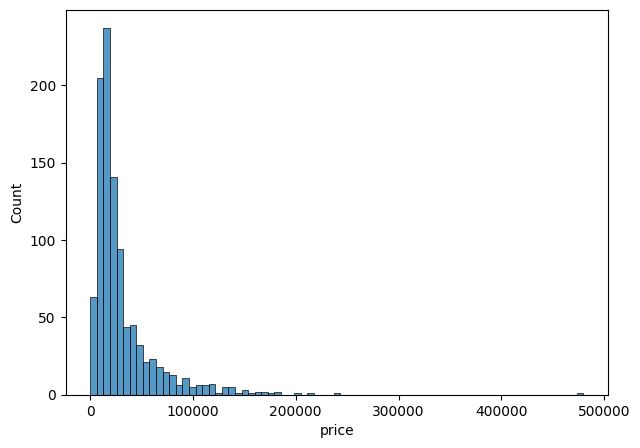

In [83]:
plt.figure(figsize=(7, 5))
sns.histplot(data=defo, x='price', bins=75)

<Axes: xlabel='rating', ylabel='Count'>

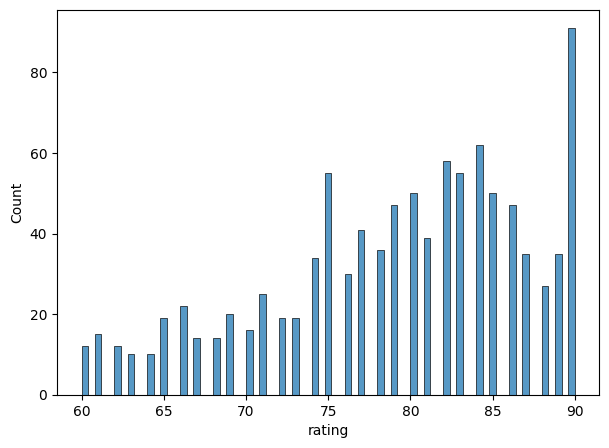

In [96]:
plt.figure(figsize=(7, 5))
sns.histplot(data=defo, x='rating', bins=75)

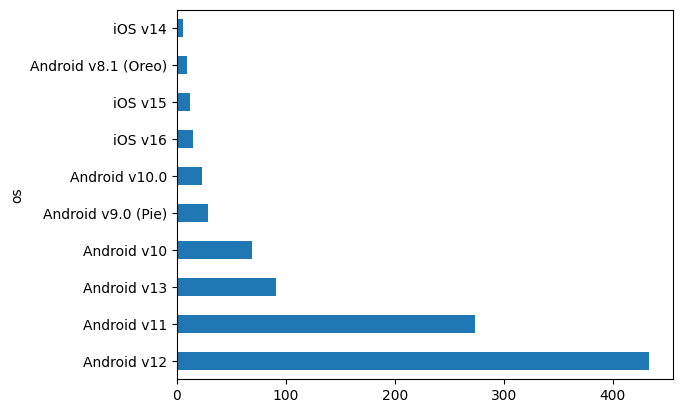

In [84]:
defo['os'].value_counts().head(10).plot.barh()
plt.show()

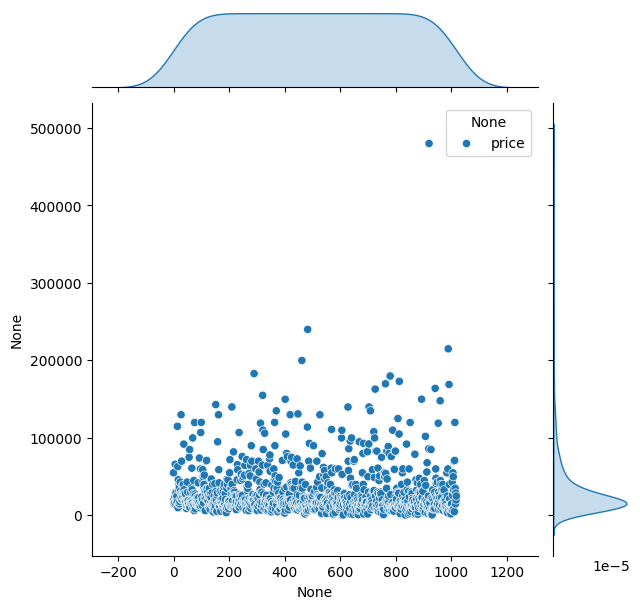

In [110]:
sns.jointplot(defo[['price']])

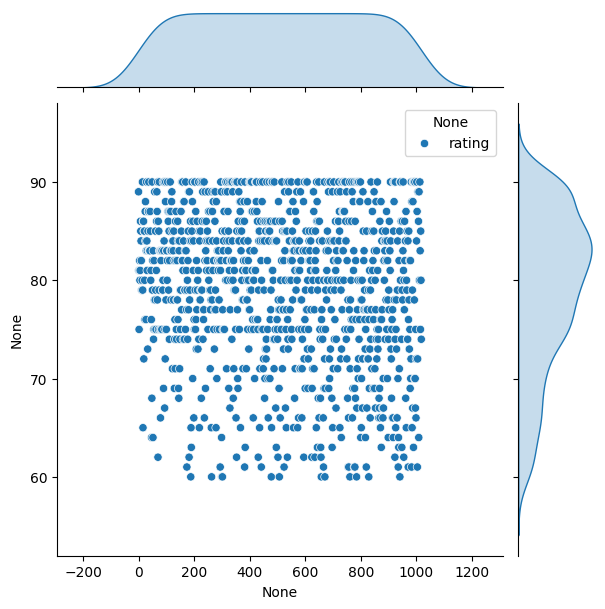

In [111]:
sns.jointplot(defo[['rating']])

### Análisis Bivariante

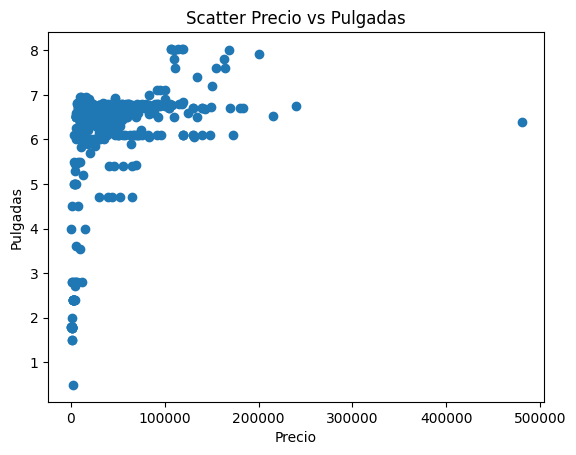

In [85]:
plt.scatter(defo['price'],defo['pulgadas'])
plt.xlabel('Precio')
plt.ylabel('Pulgadas')
plt.title('Scatter Precio vs Pulgadas')
plt.show()

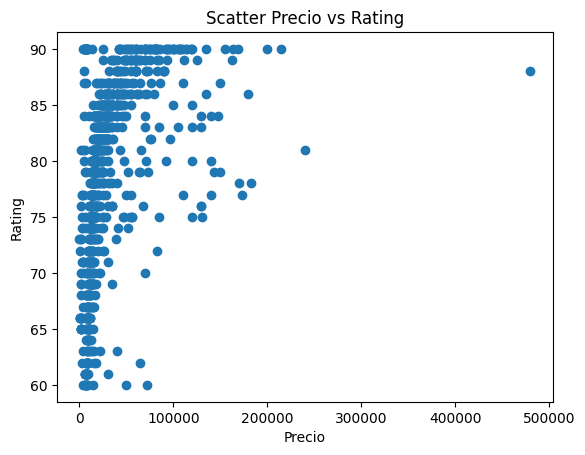

In [97]:
plt.scatter(defo['price'],defo['rating'])
plt.xlabel('Precio')
plt.ylabel('Rating')
plt.title('Scatter Precio vs Rating')
plt.show()

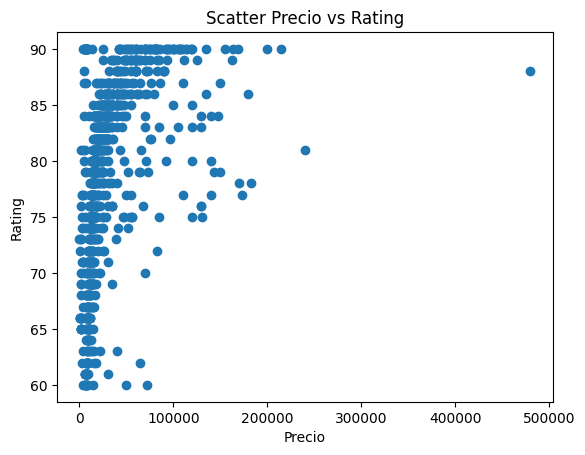

In [98]:
plt.scatter(defo['price'],defo['rating'])
plt.xlabel('Precio')
plt.ylabel('Rating')
plt.title('Scatter Precio vs Rating')
plt.show()

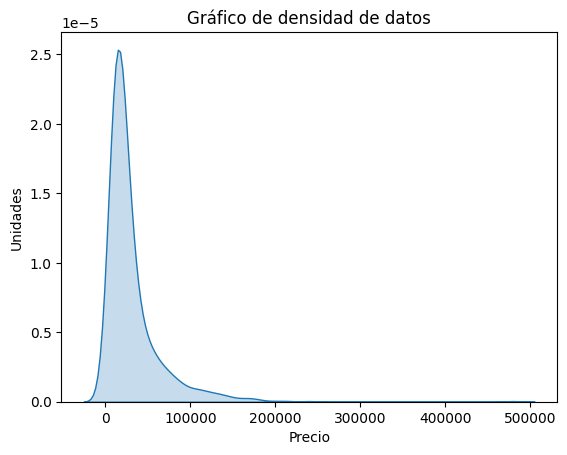

In [87]:
sns.kdeplot(defo['price'], fill=True)
plt.xlabel('Precio')
plt.ylabel('Unidades')
plt.title('Gráfico de densidad de datos')
plt.show()

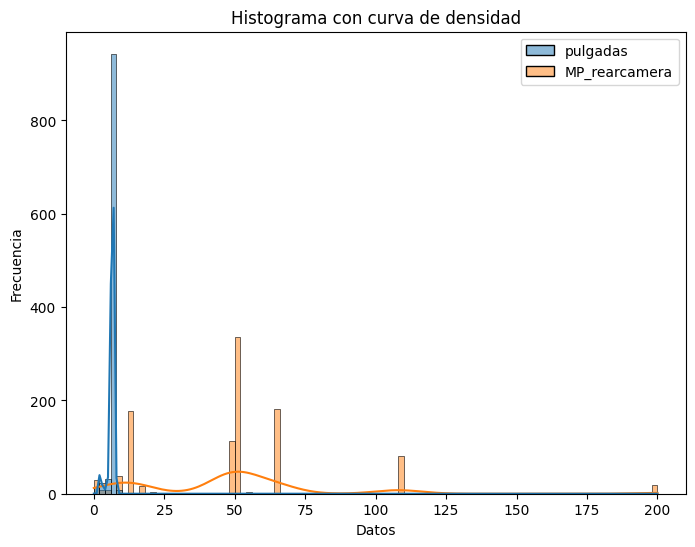

In [88]:
plt.figure(figsize=(8, 6))
sns.histplot(defo[['pulgadas', 'MP_rearcamera']], kde=True, color='skyblue', bins=100)  # Histograma con curva de densidad
plt.title('Histograma con curva de densidad')
plt.xlabel('Datos')
plt.ylabel('Frecuencia')
plt.show()

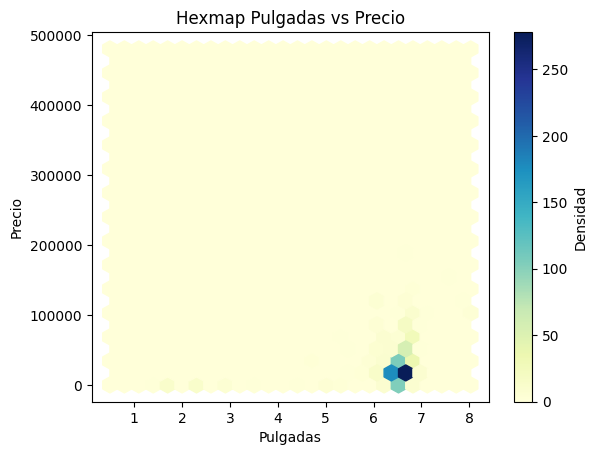

In [89]:
x = defo['pulgadas']
y = defo['price']

plt.hexbin(x, y, gridsize=25, cmap='YlGnBu')
plt.colorbar(label='Densidad')
plt.xlabel('Pulgadas')
plt.ylabel('Precio')
plt.title('Hexmap Pulgadas vs Precio')
plt.show()

### Análisis Multivariante

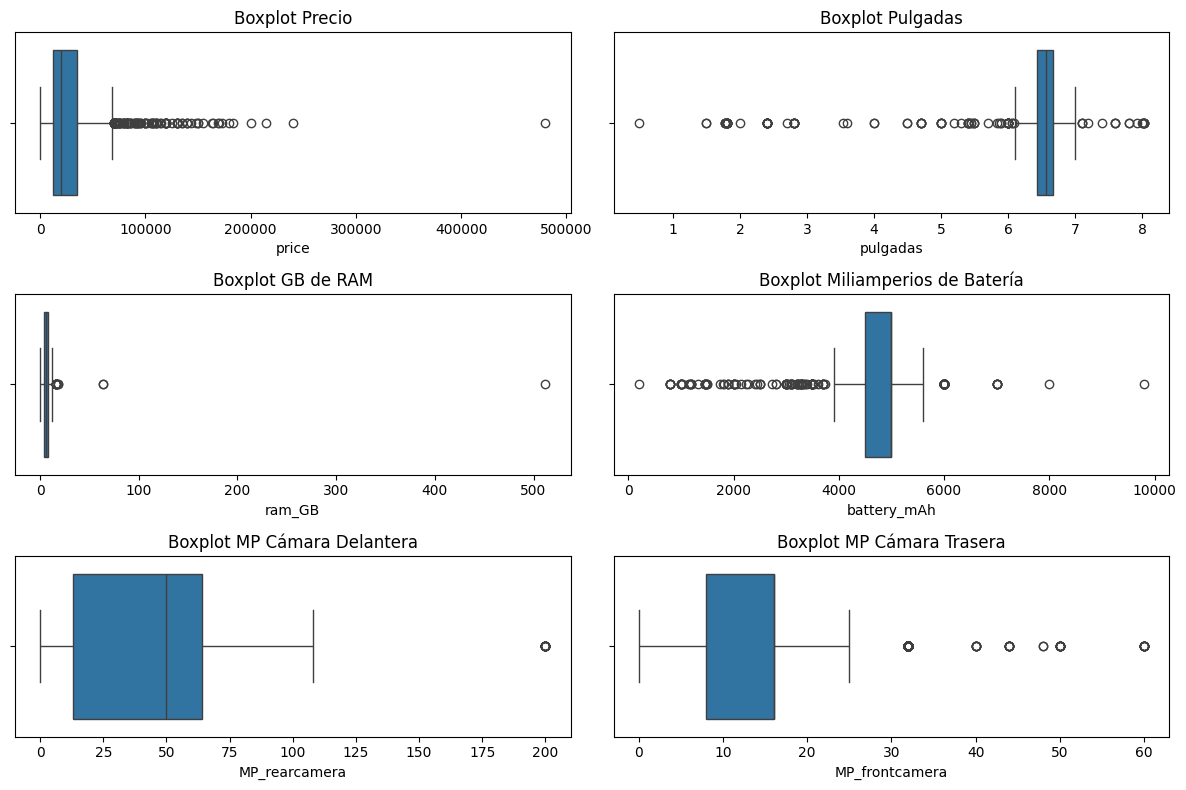

In [90]:
fig, axes = plt.subplots(3, 2, figsize=(12, 8))

sns.boxplot(x=defo['price'], ax=axes[0, 0])
axes[0, 0].set_title('Boxplot Precio')

sns.boxplot(x=defo['pulgadas'], ax=axes[0, 1])
axes[0, 1].set_title('Boxplot Pulgadas')

sns.boxplot(x=defo['ram_GB'], ax=axes[1, 0])
axes[1, 0].set_title('Boxplot GB de RAM')

sns.boxplot(x=defo['battery_mAh'], ax=axes[1, 1])
axes[1, 1].set_title('Boxplot Miliamperios de Batería')

sns.boxplot(x=defo['MP_rearcamera'], ax=axes[2, 0])
axes[2, 0].set_title('Boxplot MP Cámara Delantera')

sns.boxplot(x=defo['MP_frontcamera'], ax=axes[2, 1])
axes[2, 1].set_title('Boxplot MP Cámara Trasera')

plt.tight_layout()
plt.show()

<Axes: xlabel='rating'>

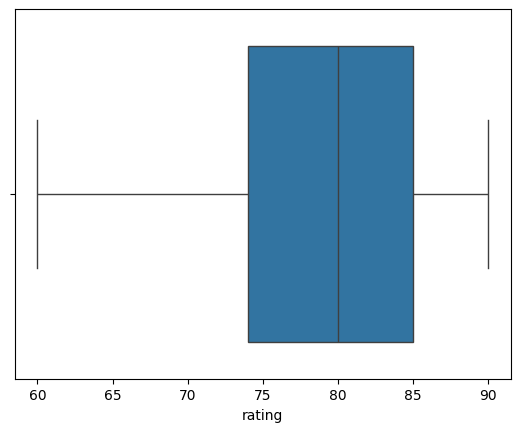

In [100]:
sns.boxplot(x=defo['rating'])

<Axes: >

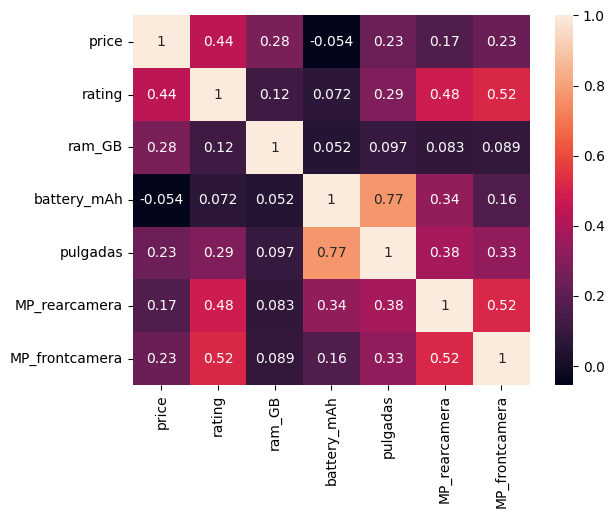

In [101]:
sns.heatmap(defo.select_dtypes(include='number').corr(), annot=True)

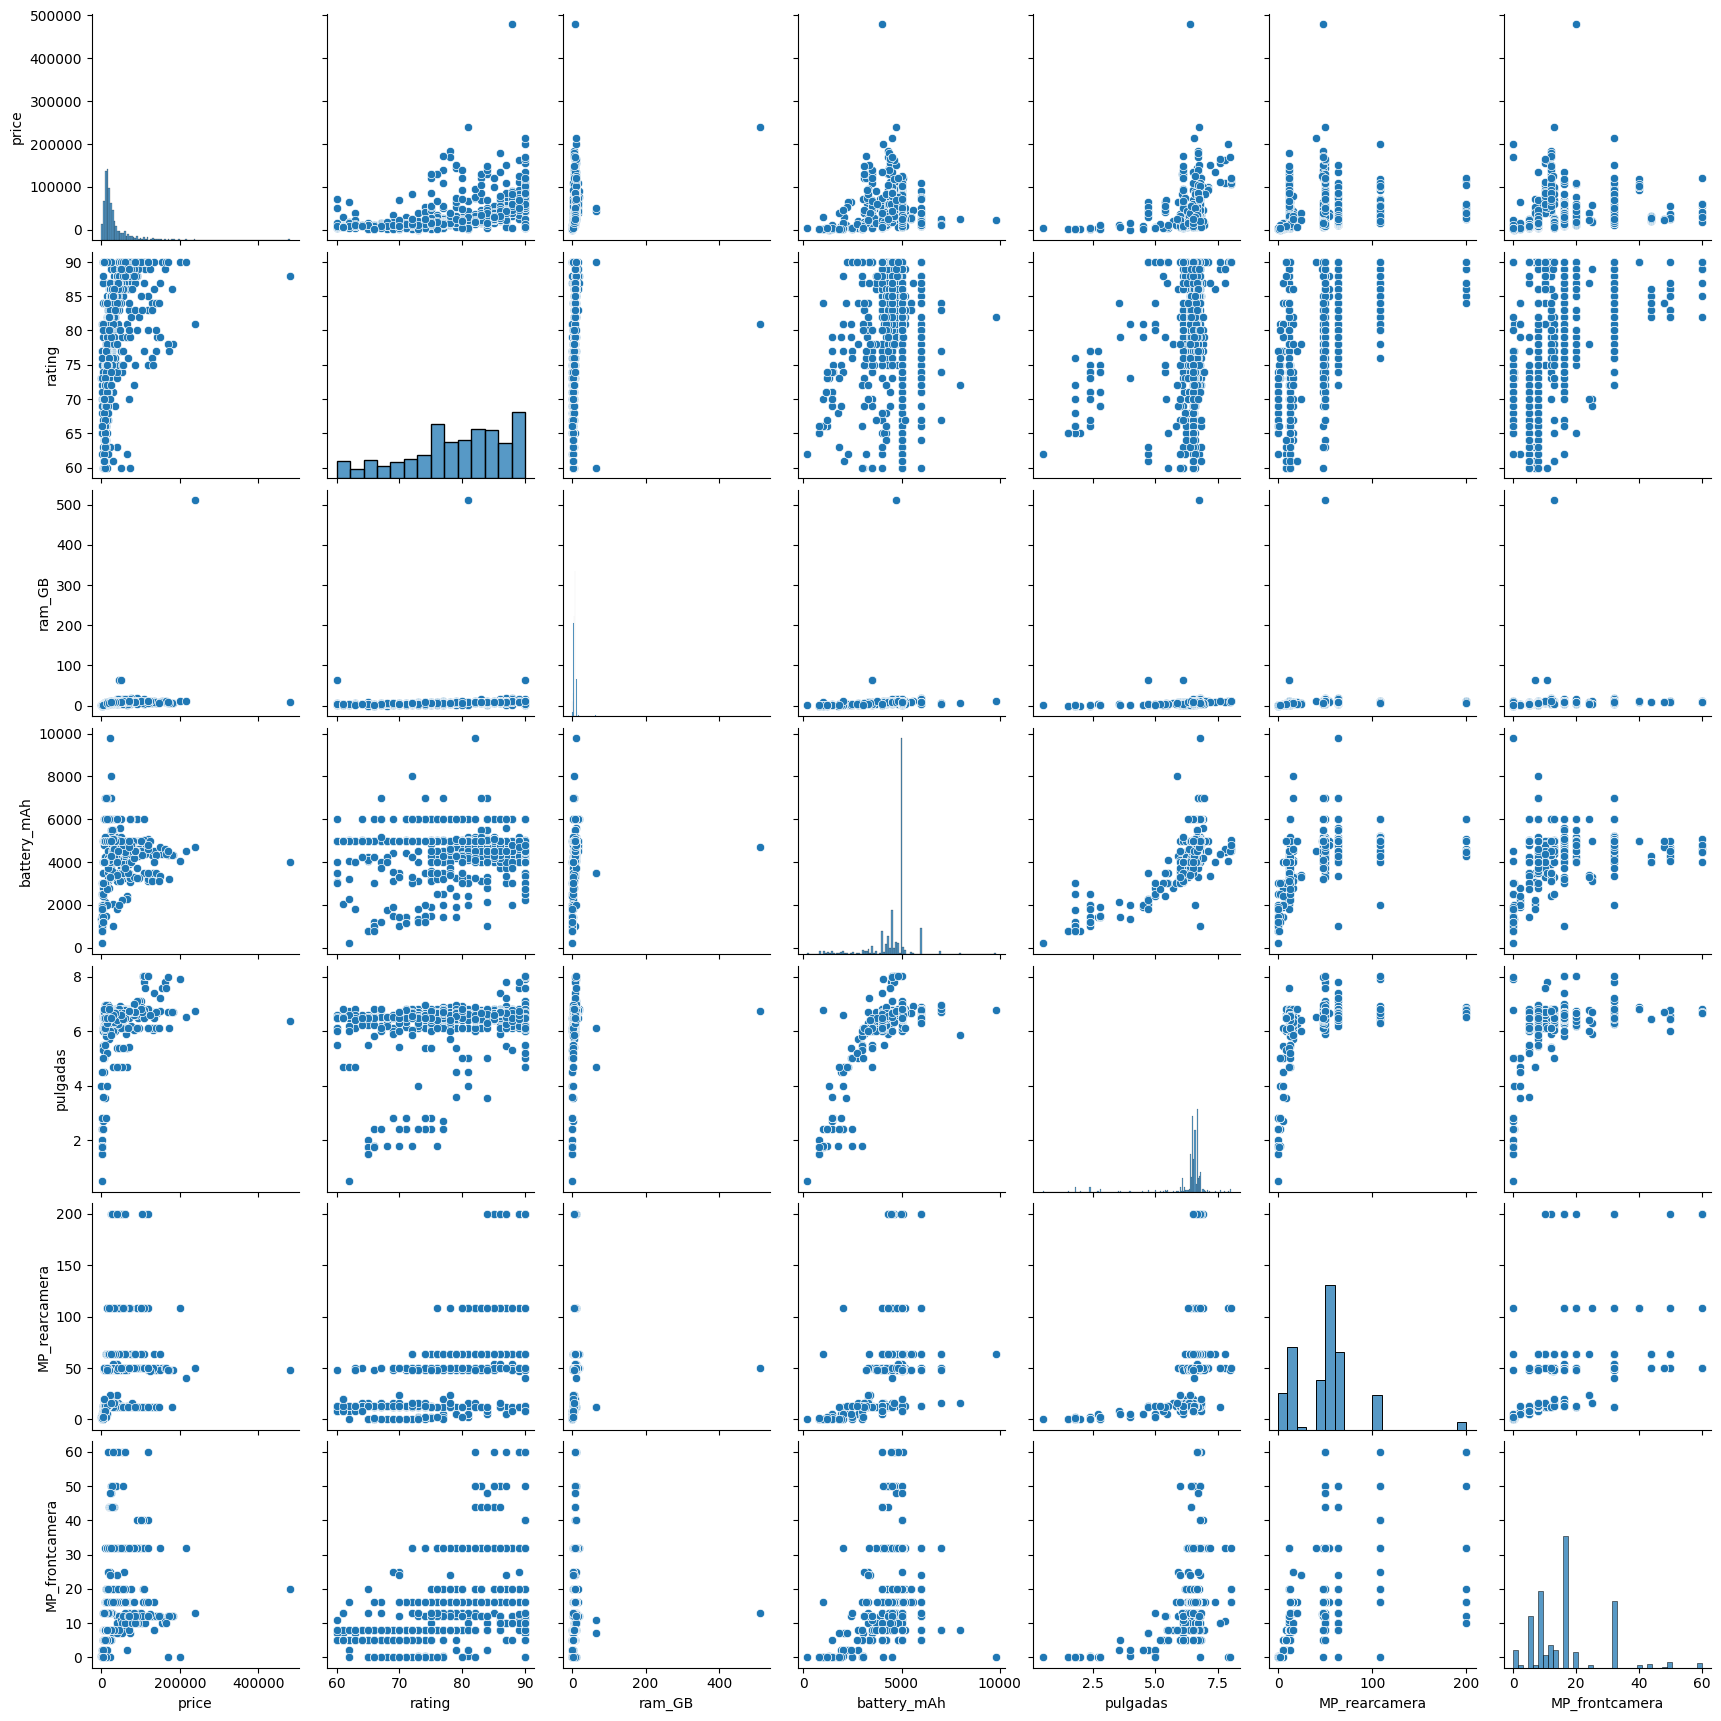

In [102]:
sns.pairplot(defo.select_dtypes(include='number'))